In [2]:
#https://github.com/velocyto-team/velocyto-notebooks/blob/master/python/DentateGyrus.ipynb

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import loompy
import velocyto as vcy
import logging
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interp1d

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

# plotting utility functions
def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    
def minimal_xticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    xlims = np.linspace(start, end_, 5)
    xlims_tx = [""]*len(xlims)
    xlims_tx[0], xlims_tx[-1] = f"{xlims[0]:.0f}", f"{xlims[-1]:.02f}"
    plt.xticks(xlims, xlims_tx)

    
def minimal_yticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    ylims = np.linspace(start, end_, 5)
    ylims_tx = [""]*len(ylims)
    ylims_tx[0], ylims_tx[-1] = f"{ylims[0]:.0f}", f"{ylims[-1]:.02f}"
    plt.yticks(ylims, ylims_tx)


#!mkdir data
#from urllib.request import urlretrieve
#urlretrieve("http://pklab.med.harvard.edu/velocyto/DentateGyrus/DentateGyrus.loom", "data/DentateGyrus.loom")

# Crate an analysis object
vlm = vcy.VelocytoLoom("/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/raw_data/DentateGyrus.loom")

# Read column attributes form the loom file and specify colors
vlm.ts = np.column_stack([vlm.ca["TSNE1"], vlm.ca["TSNE2"]])
colors_dict = {'RadialGlia': np.array([ 0.95,  0.6,  0.1]), 'RadialGlia2': np.array([ 0.85,  0.3,  0.1]), 'ImmAstro': np.array([ 0.8,  0.02,  0.1]),
              'GlialProg': np.array([ 0.81,  0.43,  0.72352941]), 'OPC': np.array([ 0.61,  0.13,  0.72352941]), 'nIPC': np.array([ 0.9,  0.8 ,  0.3]),
              'Nbl1': np.array([ 0.7,  0.82 ,  0.6]), 'Nbl2': np.array([ 0.448,  0.85490196,  0.95098039]),  'ImmGranule1': np.array([ 0.35,  0.4,  0.82]),
              'ImmGranule2': np.array([ 0.23,  0.3,  0.7]), 'Granule': np.array([ 0.05,  0.11,  0.51]), 'CA': np.array([ 0.2,  0.53,  0.71]),
               'CA1-Sub': np.array([ 0.1,  0.45,  0.3]), 'CA2-3-4': np.array([ 0.3,  0.35,  0.5])}
vlm.set_clusters(vlm.ca["ClusterName"], cluster_colors_dict=colors_dict)

2022-05-23 17:11:59,865 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-05-23 17:11:59,887 - DEBUG - Creating converter from 3 to 5


2022-05-23 17:12:39,411 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2022-05-23 17:12:39,411 - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
2022-05-23 17:12:39,412 - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2022-05-23 17:12:39,412 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2022-05-23 17:12:39,413 - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
2022-05-23 17:12:39,413 - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2022-05-23 17:12:39,413 - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
2022-05-23 17:12:39,414 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal nor

19

2022-05-23 17:13:25,416 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.
2022-05-23 17:13:25,417 - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
2022-05-23 17:13:25,418 - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2022-05-23 17:13:25,419 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2022-05-23 17:13:25,420 - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
2022-05-23 17:13:25,420 - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2022-05-23 17:13:25,421 - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
2022-05-23 17:13:25,422 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal nor

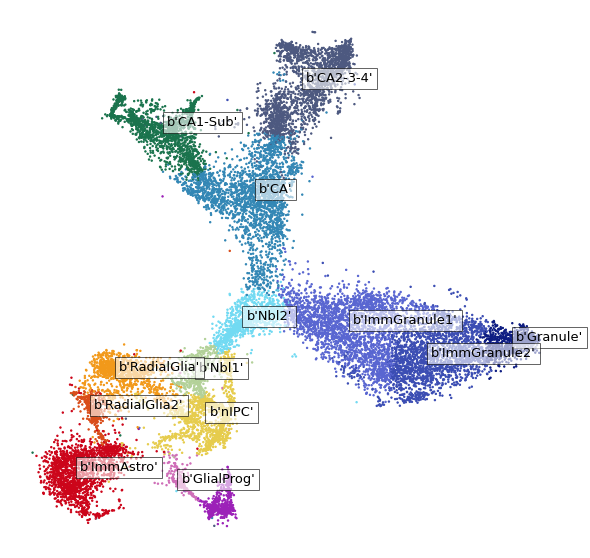

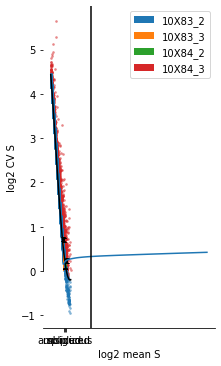

In [3]:
# Plot TSNE
plt.figure(figsize=(10,10))
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=2)
for i in range(max(vlm.ca["Clusters"])):
    ts_m = np.median(vlm.ts[vlm.ca["Clusters"] == i, :], 0)
    plt.text(ts_m[0], ts_m[1], str(vlm.cluster_labels[vlm.ca["Clusters"] == i][0]),
             fontsize=13, bbox={"facecolor":"w", "alpha":0.6})
plt.axis("off");

vlm.plot_fractions()
vlm.filter_cells(bool_array=vlm.initial_Ucell_size > np.percentile(vlm.initial_Ucell_size, 0.4))
vlm.ts = np.column_stack([vlm.ca["TSNE1"], vlm.ca["TSNE2"]])
vlm.score_detection_levels(min_expr_counts=40, min_cells_express=30)
vlm.filter_genes(by_detection_levels=True)
vlm.score_cv_vs_mean(3000, plot=True, max_expr_avg=35)
vlm.filter_genes(by_cv_vs_mean=True)

vlm.score_detection_levels(min_expr_counts=0, min_cells_express=0, min_expr_counts_U=25, min_cells_express_U=20)
vlm.score_cluster_expression(min_avg_U=0.01, min_avg_S=0.08)
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

# best with sample and expression scaling
vlm._normalize_S(relative_size=vlm.initial_cell_size,
                 target_size=np.mean(vlm.initial_cell_size))
vlm._normalize_U(relative_size=vlm.initial_Ucell_size,
                 target_size=np.mean(vlm.initial_Ucell_size))

vlm.perform_PCA()
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
n_comps

2022-05-23 17:14:16,486 - DEBUG - First search the 4000 nearest neighbours for 18140
2022-05-23 17:14:36,988 - DEBUG - Using the initialization network to find a 500-NN graph with maximum connectivity of 2000
2022-05-23 17:14:37,723 - DEBUG - Returning sparse matrix
2022-05-23 17:16:32,225 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2022-05-23 17:16:32,225 - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
2022-05-23 17:16:32,226 - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2022-05-23 17:16:32,226 - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2022-05-23 17:16:32,227 - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
2022-05-23 17:16:32,227 - DEBUG - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) nor

FileNotFoundError: [Errno 2] No such file or directory: 'figures/fig.pdf'

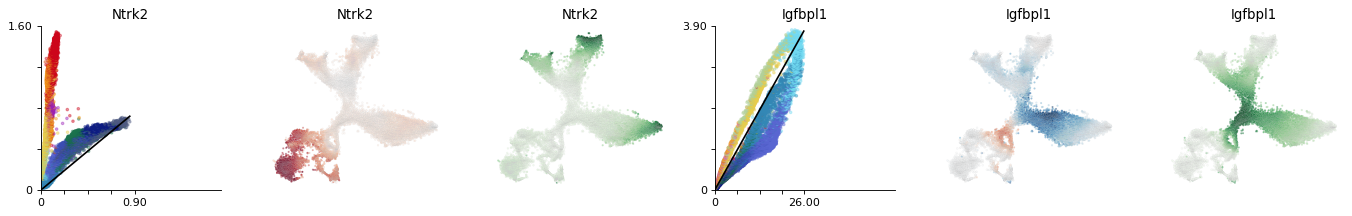

In [4]:
k = 500
vlm.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=16)

vlm.fit_gammas(limit_gamma=False, fit_offset=False)

vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_velocity")
vlm.extrapolate_cell_at_t(delta_t=1.)

plt.figure(None, (17,2.8), dpi=80)
gs = plt.GridSpec(1,6)
#for i, gn in enumerate(["Pdgfra","Igfbpl1"]):
for i, gn in enumerate(["Ntrk2","Igfbpl1"]):
    ax = plt.subplot(gs[i*3])
    try:
        ix=np.where(vlm.ra["Gene"] == gn)[0][0]
    except:
        continue
    vcy.scatter_viz(vlm.Sx_sz[ix,:], vlm.Ux_sz[ix,:], c=vlm.colorandum, s=5, alpha=0.4, rasterized=True)
    plt.title(gn)
    xnew = np.linspace(0,vlm.Sx[ix,:].max())
    plt.plot(xnew, vlm.gammas[ix] * xnew + vlm.q[ix], c="k")
    plt.ylim(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    plt.xlim(0, np.max(vlm.Sx_sz[ix,:])*2.02)
    minimal_yticks(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    minimal_xticks(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    despline()
    
    vlm.plot_velocity_as_color(gene_name=gn, gs=gs[i*3+1], s=3, rasterized=True)

    vlm.plot_expression_as_color(gene_name=gn, gs=gs[i*3+2], s=3, rasterized=True)
    
plt.tight_layout()

plt.savefig("figures/fig.pdf")

In [6]:
len(vlm.ra["Gene"])

2159

In [7]:
vlm.cluster_labels.shape

(18140,)

In [ ]:
import pandas as pd
genelist_all=vlm.ra["Gene"] #2159
vlm.cluster_labels.shape #(18140,)

data=pd.DataFrame()
for g in genelist_all:
    ix=np.where(vlm.ra["Gene"] == g)[0][0]
    data_onegene = pd.DataFrame({'gene': g, 'u0': vlm.Ux_sz[ix,:],'s0': vlm.Sx_sz[ix,:],'clusters':vlm.ca["ClusterName"]}, columns=['gene', 'u0','s0',"clusters"])
    data=data.append(data_onegene,ignore_index=True)

i=0
for g in genelist_all:
    i=i+1
    print("processing:"+str(i)+"/"+"2159")
    ix=np.where(vlm.ra["Gene"] == g)[0][0]
    data_onegene = pd.DataFrame({'gene': g, 'u0': vlm.Ux_sz[ix,:],'s0': vlm.Sx_sz[ix,:],'clusters':vlm.ca["ClusterName"]}, columns=['gene', 'u0','s0',"clusters"])
    data_onegene.to_csv('data/denGyr.csv',mode='a',header=False)

den_gyr=pd.read_csv("data/denGyr.csv",names=['gene', 'u0','s0',"clusters"])

In [14]:
import pandas as pd
load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv')
#load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv')
#load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv')

genes=list(set(load_raw_data['gene_name']))
cells=load_raw_data[load_raw_data.gene_name==genes[0]]

print(len(genes))
print(len(cells))


2159
18140


In [15]:
import pandas as pd
#load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv')
load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv')
#load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv')

genes=list(set(load_raw_data['gene_name']))
cells=load_raw_data[load_raw_data.gene_name==genes[0]]

print(len(genes))
print(len(cells))

2000
3696


In [16]:
import pandas as pd
#load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv')
#load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/PancreaticEndocrinogenesis.csv')
load_raw_data=pd.read_csv('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv')

genes=list(set(load_raw_data['gene_name']))
cells=load_raw_data[load_raw_data.gene_name==genes[0]]

print(len(genes))
print(len(cells))

2000
12329
